In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
#read file
one = []
with open("In-class_network.txt","r") as f:
    for line in f:
        line = line.strip().split("\t")
        one.append(line)
one=pd.DataFrame(one[1:],columns=one[0])

In [3]:
one.head()

,ID,IDs-of-acquaintances,sex,age,department,time-to-bed
0,1,58,m,21,phys,after-0
1,2,"56,34,25",f,18,stat,after-0
2,4,"13,18,66,61,5,10",m,19,stat,after-0
3,5,"66,13,18",m,18,stat,after-0
4,6,"19,53,38",m,20,stat,after-0


In [4]:
#區分nodes和edges
ID=[]
ID_node=[]
for i in range(len(one)):
    if one["IDs-of-acquaintances"][i]==" ":
        ID_node.append(int(one["ID"][i]))
    if one["IDs-of-acquaintances"][i]!=" ":    
        ID.append(one["ID"][i])
        ID.append(one["IDs-of-acquaintances"][i])

for i in range(1,len(ID),2):
    ID[i]=ID[i].split(",")

number=[]
for j in range(1,len(ID),2):
    for k in range(len(ID[j])):
        number.append((int(ID[j-1]),int(ID[j][k])))

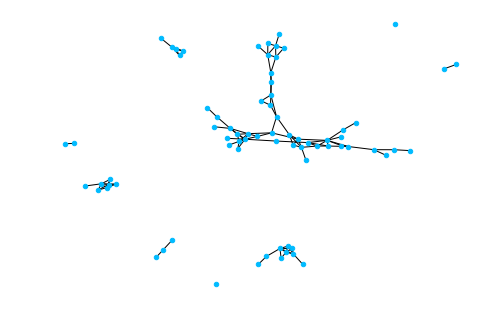

In [6]:
#把nodes和edges加到Ｇ裡面
G=nx.Graph()
G.add_nodes_from(ID_node)
G.add_edges_from(number)

#draw
def draw_graph(G):
    nx.draw(G, node_color = '#00BBFF', node_size = 20, with_labels = False)
    plt.show()
draw_graph(G)    #3(a)

In [7]:
#ID length
len(one["ID"]) #3(b)i

56

In [8]:
#G size
G.size()  #3(b)ii

109

In [9]:
#averange degree
avg_degree = np.mean(list(dict(G.degree()).values()))
avg_degree #3(b)iii

2.9066666666666667

In [10]:
#the size of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)   #3(b)v

45

In [11]:
#e/emax
e_max=(len(one["ID"])*(len(one["ID"])-1))/2
e_division_emax=G.size()/e_max
print(e_division_emax)  #3(c)

0.07077922077922078


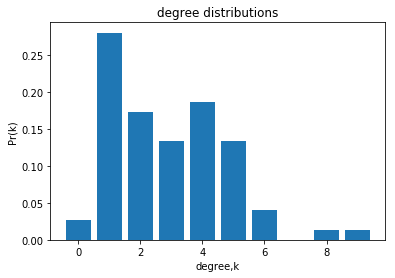

In [12]:
def degree_distributions(G):
    #個別的degree
    G_degree=[]
    for i in range(len(G.degree())):
        G_degree.append(G.degree()[i])
    #按照大小排列degree 還有算出有幾個
    G_degree_count=[]
    for i in range(len(sorted(G_degree))):
        G_degree_count.append((sorted(G_degree)[i],G_degree.count(sorted(G_degree)[i])))

    G_degree_count=pd.DataFrame(list(set(G_degree_count)))
    G_degree_count[2]=G_degree_count[1]/sum(G_degree_count[1])
    #draw
    plt.bar(G_degree_count[0],G_degree_count[2])
    plt.title("degree distributions")
    plt.xlabel("degree,k")
    plt.ylabel("Pr(k)")
    plt.show()
degree_distributions(G)

In [13]:
#算出有幾個三角形
tri = nx.triangles(G)
sum(tri.values())/3  #3(e)

52.0